<a href="https://colab.research.google.com/github/Haodi-Qi/Talk-Like-Ted/blob/master/TEDCODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import libraries and file**

In [0]:
# !pip install pandas
# !pip install numpy
# !python -m nltk.downloader all
# !pip install gensim

import pandas as pd
import numpy as np
import ast
import re

import nltk
from nltk.corpus import wordnet 
from nltk.corpus import stopwords 
from nltk.corpus import words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [0]:
from google.colab import drive
drive.mount('/content/drive')
# "Add to My Drive" the entire folder first
# click the link to get the authorization code

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
transcript_data = '/content/drive/My Drive/DAP Code/transcripts.csv' #directory to the file
transcript_df = pd.read_csv(transcript_data)
# ted_main_df['url'] ends with "\r\n"
# transcript_df['url'] ends with "\n"
# strip both so that can use url as a primary key
transcript_df['url'] =transcript_df['url'].apply(lambda x:x.strip())
transcript_df.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [0]:
ted_main_data = '/content/drive/My Drive/DAP Code/ted_main.csv'
ted_main_df = pd.read_csv(ted_main_data)
ted_main_df['url'] =ted_main_df['url'].apply(lambda x:x.strip())
ted_main_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## Corr btw avg sentence length & ratings
### especially negative ratings, such as Longwinded and Confusing



#### find rating of each talk in %

In [0]:
all_attr = set()
for index,row in ted_main_df.iterrows():
    talk_ratings = ast.literal_eval(row['ratings'])
    for indiv_rating in talk_ratings:
        all_attr.add(indiv_rating['name'])

# create a separate dataframe for all ratings for all talks for analysis
rating_count = {'url':[]}
for index,row in ted_main_df.iterrows():
    talk_ratings = ast.literal_eval(row['ratings'])
    rating_count['url'].append(row['url'])
    for rating in talk_ratings:
        if rating['name'] not in rating_count:
            rating_count[rating['name']]=[rating['count']]
        else:
            rating_count[rating['name']].append(rating['count'])
rating_ratio_df = pd.DataFrame(rating_count)

In [0]:
rating_ratio_df['total'] = rating_ratio_df.sum(axis=1)

for attr in all_attr:
    rating_ratio_df[attr] = rating_ratio_df[attr] / rating_ratio_df['total']*100

In [0]:
# sort by an attribute
# rating_ratio_df.sort_values(by=['Longwinded'],axis=0,ascending=False)

#### find the avg sentence length of each talk and remove abnomality

In [0]:
def cal_sentence_avg_length(text):
  # split into sentences
    sentences = nltk.sent_tokenize(text)

    sentence_df = pd.DataFrame(np.array(sentences),columns=['sentence'])
    sentence_df['word_count'] = sentence_df['sentence'].apply(lambda x: len(x.split()))

    return sentence_df['word_count'].mean()

In [0]:
avg_sentence_len_df = pd.DataFrame()
avg_sentence_len_df['url']=transcript_df['url']
avg_sentence_len_df['avg_length']=0


for index, row in transcript_df.iterrows():
    if "♫" not in row['transcript']:
        avg_sentence_len_df.loc[avg_sentence_len_df['url']==row['url'],['avg_length']]=cal_sentence_avg_length(row['transcript'])

In [0]:
avg_sentence_len_df.head()
# transcript_df.iloc[58,0]
# avg_sentence_len_df.iloc[57]['url']

,url,avg_length
0,https://www.ted.com/talks/ken_robinson_says_sc...,12.578947
1,https://www.ted.com/talks/al_gore_on_averting_...,15.761194
2,https://www.ted.com/talks/david_pogue_says_sim...,12.032847
3,https://www.ted.com/talks/majora_carter_s_tale...,18.131737
4,https://www.ted.com/talks/hans_rosling_shows_t...,13.819383


finding:
 1.  there are talks with avg sentence length > 100
  they are singing songs
  e.g. 
  index 75 & 99
  
 2. talks with no languages (e.g dance ) are not included in the transcript.csv

#### find the corr btw each rating and avg_sentence_length

In [0]:
def merge_with_ratio(df):
    return df.join(rating_ratio_df,lsuffix='_url').drop(['url_url'],axis=1)

In [0]:
avg_len_rating_df = avg_sentence_len_df.copy()
# use left join to combine two df
# avg_len_rating_df.join(rating_ratio_df,lsuffix='_url').head()
avg_len_rating_df = avg_len_rating_df.join(rating_ratio_df,lsuffix='_url').drop(['url_url'],axis=1)

In [0]:
# only use the rows where the value of specific attr is not 0
def retrieve_valid_rows(attr, df):
    return df.loc[df[attr]>0][[attr,'avg_length']]

In [0]:
corr_values = {}
for attr in all_attr:
    attr_df = retrieve_valid_rows(attr,avg_len_rating_df)
    attr_corr = attr_df.corr()
    corr_values[attr] = attr_corr.iloc[0][1]

In [0]:
corr_avg_length_df = pd.DataFrame.from_dict(corr_values, orient='index')
corr_avg_length_df.columns=['avg_length']
corr_avg_length_df

,avg_length
Fascinating,-0.004945
Jaw-dropping,-0.047764
OK,-0.012683
Informative,0.053487
Persuasive,-0.008268
Courageous,0.017642
Inspiring,0.026808
Longwinded,-0.049690
Ingenious,0.011845
Unconvincing,-0.033505


## Tf-idf using textblob library
### reference: https://stevenloria.com/tf-idf/

### Import other libraries and define functions for tf-idf

In [0]:
from textblob import TextBlob as tb
import math

# expand contractions such as I'm to I am
!pip install contractions
import contractions
from nltk.stem import WordNetLemmatizer

In [0]:
def tf(word, blob):
    n = blob.words.count(word)
    if n< 10:
        n = 0
    return n/ len(blob.words)

def tf_idf_process(blob):
    '''
    initially only .lower() & remove stopwords => find there are ♫, - etc non-alphabetic chr
        so we use .isalpha() 
    then we found words like "wk", "tm" have very high tf-idf values
        they are just initials of a person, no meaning
        so we use word.words() to check
    '''
    tag_dict = {"J": wordnet.ADJ, 
                "N": wordnet.NOUN, 
                "V": wordnet.VERB, 
                "R": wordnet.ADV}
   
    # lowercase + remove stopwords + remove non-alphabets + lemmatize 
    stop_words = set(stopwords.words('english'))
    english_words = set(words.words())
      
    processed_blob = [word.lower() for word in blob.words 
                         if word.isalpha() and word in english_words and word.lower() not in stop_words]
    
    lemmatized_blob = []
    for word, tag in nltk.pos_tag(processed_blob):
        if tag[0] in tag_dict:
            word = WordNetLemmatizer().lemmatize(word,pos=tag_dict[tag[0]])
        lemmatized_blob.append(word)
    
    string = " ".join(lemmatized_blob)
    return tb(string)


# def n_containing(word, bloblist):
#     return sum(1 for blob in bloblist if word in blob.words)

# def idf(word,bloblist):
#     return math.log(len(bloblist) / n_containing(word, bloblist))

# def tfidf(word, blob, bloblist):
# #     if tf(word,blob):
# #       return tf(word, blob) * idf(word, bloblist)
#     return tf(word, blob) * idf(word, bloblist)

  
# def idf2(word, bloblist):
#     return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

### version 1: join transcript_df & ted_main_df 
failed haha

got strange result such as "la" "da" as the top tf-idf words

somehow the checking of "live music" and "performance" tags fail 

In [0]:
# sample = transcript_df.copy()
sample = transcript_df.copy()

In [0]:
a = set(ast.literal_eval(list(ted_main_df.loc[ted_main_df['url']=='https://www.ted.com/talks/natalie_merchant_sings_old_poems_to_life\r\n']['tags'])[0]))
a

{'literature', 'music', 'performance', 'poetry'}

In [0]:
# remove "\r\n" in url
ted_main_df['url'] = ted_main_df['url'].apply(lambda x:x.strip())
sample['url'] = sample['url'].apply(lambda x:x.strip())

In [0]:
sample = sample.join(ted_main_df.set_index('url'),on='url')

In [0]:
sample

In [0]:
bloblist = []
bloburl = []

for i,row in sample.iterrows():    
    tags = set(ast.literal_eval(row['tags']))
    print(i,end=',')
    
    if "performance" not in tags or "live music" not in tags:   
        removed_bracket = re.sub(r'\([^)]*\)','', row['transcript']).strip()
        if len(removed_bracket) >100:
            contractions_fixed = contractions.fix(removed_bracket)       
            processed_transcript = process(tb(contractions_fixed))
            bloblist.append(processed_transcript)
            bloburl.append(row['url'])
        

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

### version 2: not using join
success!

just use url as the primary key to retrieve the tags for the particular ted talk and check for 'live music' and 'performance'

In [0]:
tf_idf_sample = transcript_df.copy()

In [0]:
performance_transcript_id = []
bloblist = []

for i,row in tf_idf_sample.iterrows():  
    # find the respective tags for the talk from ted_main_df and convert it into set type 
    tags = set(ast.literal_eval(list(ted_main_df.loc[ted_main_df['url']==row['url']]['tags'])[0]))
    print(i,end=',')
    
    if "performance" in tags or "live music" in tags:
        # remove performances transcripts
        performance_transcript_id.append(i)
    else:
        removed_bracket = re.sub(r'\([^)]*\)','', row['transcript']).strip()
        # some performances transcripts do have some speech by the performer, so threshold of 100 words as the length of the transcript is set for a proper talk
        if len(removed_bracket) >100:
            contractions_fixed = contractions.fix(removed_bracket)       
            processed_transcript = tf_idf_process(tb(contractions_fixed))
            bloblist.append(processed_transcript)
            row['transcript'] = processed_transcript
        else:
            performance_transcript_id.append(i)
            
tf_idf_sample = tf_idf_sample.drop(performance_transcript_id)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

###inefficient way of calculating tf-idf


In [0]:
top_words = {}
btm_words = {}


for i in range(sample.count()[0]):
    print(i,end=',')
    
    # this way of calculating tf-idf is very inefficient as for the same word in diff doc, the algo will check all the doc to see if contains word
    # worse case: n doc of length m all have the word => O(m^2n^2)
    scores = {word: tfidf(word, sample.iloc[i]['transcript'], sample['transcript']) for word in sample.iloc[i]['transcript'].words}
  
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        if word not in top_words or score > top_words[word][0]:
            top_words[word] = score,sample.iloc[i]['url']
    for word, score in sorted_words[-1:-4:-1]:
        if (word not in btm_words or score < btm_words[word][0]) and score > 0:
            btm_words[word] = score,sample.iloc[i]['url']

In [0]:
sorted_top_words = sorted(top_words.items(), key=lambda x: x[1][0], reverse=True)
sorted_btm_words = sorted(btm_words.items(),key=lambda x:x[1][0])

for i in sorted_top_words[0:10]:
    print(i)
# print(sorted_top_words[:10])
# print(sorted_btm_words[:3])

### create idf dictionary

In [0]:
# create a dict to count number of doc that contains the word for all words
doc_freq_dict = {}
for blob in bloblist:
    words_set = set(blob.words)
    for word in words_set:
        if word in doc_freq_dict:
            doc_freq_dict[word] += 1
        else:
            doc_freq_dict[word] = 1

In [0]:
doc_count = tf_idf_sample.count()
# doc_count = 2
idf_dict = {}
for word in doc_freq_dict:
    idf_dict[word] = math.log(doc_count[0]/doc_freq_dict[word])

### more efficient by using idf dict

In [0]:
top_words = {}
btm_words = {}


for i in range(len(bloblist)):
    blob = bloblist[i]

    scores = {word: (tf(word,blob)*idf_dict[word]) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        if word not in top_words or score > top_words[word][0]:
#             top_words[word] = score,bloburl[i]
            top_words[word] = score,tf_idf_sample.iloc[i]['url']
    for word, score in sorted_words[-1:-4:-1]:
        if (word not in btm_words or score < btm_words[word][0]) and score > 0:
#             btm_words[word] = score,bloburl[i]
            btm_words[word] = score,tf_idf_sample.iloc[i]['url']

In [0]:
sorted_top_words = sorted(top_words.items(), key=lambda x: x[1][0], reverse=True)
sorted_btm_words = sorted(btm_words.items(),key=lambda x:x[1][0])

for i in sorted_top_words[:10]:
    print(i)

('pollen', (0.4636154009137853, 'https://www.ted.com/talks/jonathan_drori_every_pollen_grain_has_a_story'))
('bee', (0.3928354050901057, 'https://www.ted.com/talks/anand_varma_a_thrilling_look_at_the_first_21_days_of_a_bee_s_life'))
('hum', (0.370603967510303, 'https://www.ted.com/talks/shonda_rhimes_my_year_of_saying_yes_to_everything'))
('silk', (0.34280922514324974, 'https://www.ted.com/talks/cheryl_hayashi_the_magnificence_of_spider_silk'))
('zodiac', (0.3402777244653986, 'https://www.ted.com/talks/shaolan_the_chinese_zodiac_explained'))
('phosphorus', (0.3348097863382413, 'https://www.ted.com/talks/mohamed_hijri_a_simple_solution_to_the_coming_phosphorus_crisis'))
('superconductor', (0.31346801888852166, 'https://www.ted.com/talks/boaz_almog_levitates_a_superconductor'))
('slime', (0.3120335057790023, 'https://www.ted.com/talks/heather_barnett_what_humans_can_learn_from_semi_intelligent_slime_1'))
('jihad', (0.30658285366568033, 'https://www.ted.com/talks/bobby_ghosh_why_global_ji

####When searching the word in Ted Talks (using first 100 talks):
```
top 10:

gang: 2nd Page mid
skeletal: 1st result 
vagina: 1st result
*god: 2nd result
*cancer: 1st Page mid (same talk as skeletal)
mockingbird: 1st result
muscle: 3rd result (same talk as skeletal)
*violin: 2nd result
howard: 1st Page mid
bonobo: 1st result

*wikipedia: 1st Result
panbanisha: 1st Result (same talk as bonobo)
charcoal: 1st Result
mockingbirds: 1st Result (same talk as mockingbird)
spaghetti: 1st Result (same talk as howard)
kanzi: 3rd Result (same talk as bonobo)
sauce: 1st Result (same talk as howard)
drum: 1st Page mid
oranges: 1st Result (actual 1st result is a musical performance with no transcript)
----------------------------------

bottom 10:

continent: 2nd Page 3rd
planet: not found 
planets: 3rd Page last (same talk as planet)
# voodoo: 1st result
# bangura: 1st result (the only talk)
certainty: 1st result (actual 1st is a new talk not in our dataset)
patients: 3rd Page mid
disasters: 1st Page btm (related tag: disaster relief)
transistors: 1st Page 5th
doubling: 1st Page mid (same talk as transistors)

```



## Sentiment analysis using textblob library


In [0]:
sample_for_sentiment_analysis = transcript_df.copy()
top_sentiment =[]
btm_subjectivity = []

for i, row in sample_for_sentiment_analysis.iterrows():
    
    tb_transcript = tb(row['transcript'])
    result = tb_transcript.sentiment
    
    top_sentiment.append((result[0],row['url']))
    btm_subjectivity.append((result[1],row['url']))


In [0]:
tb('like').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [0]:
top_sentiment.sort(key=lambda x:x[0],reverse=True)
btm_subjectivity.sort(key=lambda x:x[0])

for i in range(3):
    print(top_sentiment[i])
for i in range(3):
    print(btm_subjectivity[i])

(0.5944444444444444, 'https://www.ted.com/talks/david_byrne_sings_nothing_but_flowers')
(0.5872296494355318, 'https://www.ted.com/talks/naturally_7_jams_fly_baby_with_an_orchestra_of_vocals')
(0.5285714285714286, 'https://www.ted.com/talks/thomas_dolby_and_rachelle_garniez')
(0.0, 'https://www.ted.com/talks/kenichi_ebina_s_magic_moves')
(0.0, 'https://www.ted.com/talks/robert_gupta_and_joshua_roman_duet_on_passacaglia')
(0.0, 'https://www.ted.com/talks/quixotic_fusion_dancing_with_light')


## Corrlation between audience reactions as Laughter vs Funny rating ratio

In [0]:
sample = transcript_df.copy()

In [0]:
for i, row in sample.iterrows():
    sample.loc[i,'Funny']=list(rating_ratio_df.loc[row['url']==rating_ratio_df['url']]['Funny'])[0]
    bracket_contents = re.findall('\(.*?\)',row['transcript'])
    laughter_num = bracket_contents.count('(Laughter)')
    sample.loc[i,'laughter_num']=laughter_num

In [0]:
sample['laughter_num'].corr(sample['Funny'])

0.6036358253143251

## Comparison btw ratings of performances & non-performances

In [0]:
sample = transcript_df.copy()

In [0]:
performance_url = []
non_performance_url = []
for i, row in sample.iterrows():
    tags = set(ast.literal_eval(list(ted_main_df.loc[ted_main_df['url']==row['url']]['tags'])[0]))
    if "performance" in tags or "live music" in tags:
        performance_url.append(row['url'])       
    else:
        non_performance_url.append(row['url'])

In [0]:
average_rating_ratio = pd.DataFrame()
average_rating_ratio['overall'] = rating_ratio_df[rating_ratio_df.url.isin(performance_url+non_performance_url)].mean(numeric_only=True).drop(['total'])
average_rating_ratio['performances'] = rating_ratio_df[rating_ratio_df.url.isin(performance_url)].mean(numeric_only=True).drop(['total'])
average_rating_ratio['non-performances'] = rating_ratio_df[rating_ratio_df.url.isin(non_performance_url)].mean(numeric_only=True).drop(['total'])

In [0]:
average_rating_ratio

,overall,performances,non-performances
Beautiful,7.864271,24.481610,6.983694
Confusing,1.195573,1.382767,1.185653
Courageous,6.524389,4.825671,6.614407
Fascinating,12.725304,11.494606,12.790521
Funny,4.977560,10.607827,4.679204
Informative,16.630004,3.099745,17.346992
Ingenious,6.723284,5.738727,6.775457
Inspiring,18.951434,16.036625,19.105894
Jaw-dropping,4.735928,9.102438,4.504540
Longwinded,1.960871,1.834037,1.967592


##LDA - topic modelling
try with gensim library

In [0]:
from gensim.corpora import Dictionary
from gensim.parsing.preprocessing import remove_stopwords # return a string
from gensim.utils import simple_preprocess # return a list (lowercase, tokenize)
from nltk.stem import WordNetLemmatizer

from gensim.models import CoherenceModel,LdaMulticore, LdaModel
# Import required packages
from gensim.models import LdaModel
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [0]:
def lda_preprocess(doc,meaningless_words):
    # remove stopwords => lowercase & tokenize & remove non-alphabets => lemmatize

    tag_dict = {"J": wordnet.ADJ, 
                "N": wordnet.NOUN, 
                "V": wordnet.VERB, 
                "R": wordnet.ADV}
    
    removed_bracket = re.sub(r'\([^)]*\)','', doc).strip()
    contraction_fixed = contractions.fix(removed_bracket.lower())
    
    removed_stopwords = remove_stopwords(contraction_fixed)
    
    #set the min length of the word = 3
    preprocessed =  simple_preprocess(removed_stopwords,min_len = 3, deacc=True)
        
    lemmatized = []
    for word, tag in nltk.pos_tag(preprocessed):
        if tag[0] in tag_dict:
            word = WordNetLemmatizer().lemmatize(word,pos=tag_dict[tag[0]])
        lemmatized.append(word)
    return lemmatized  

In [0]:
lda_doc = transcript_df['transcript']
lda_list = [lda_preprocess(doc,meaningless_words) for doc in lda_doc]

In [0]:
meaningless_words = ['people','go','thing','like','think','know','want','get','well','look','say','have','use','this','there','come','way','time','actually','little','tell','you']
meaningless_words = set(meaningless_words)

In [0]:
# create a dict to count number of doc that contains the word for all words
doc_freq_dict = {}
for word_list in lda_list:
    words_set = set(word_list) - meaningless_words
    for word in words_set:
        if word in doc_freq_dict:
            doc_freq_dict[word] += 1
        else:
            doc_freq_dict[word] = 1

In [0]:
# lda_list_final = [[word for word in doc if doc_freq_dict[word] > 10] for doc in lda_doc]
lda_list_final = []
for word_list in lda_list:
    final_list = []
    for word in word_list:
        if word not in meaningless_words and doc_freq_dict[word] > 10:
            final_list.append(word)
    lda_list_final.append(final_list)

In [0]:
dictionary = Dictionary(lda_list_final)
lda_doc_term_matrix = [dictionary.doc2bow(doc) for doc in lda_list_final]

In [0]:
# # lda_model = Lda(lda_doc_term_matrix, num_topics = 12,id2word=dictionary,passes = 50)
# lda_model =  LdaMulticore(lda_doc_term_matrix, 
#                                    num_topics = 5, 
#                                    id2word = dictionary,                                    
#                                    passes = 10,
#                                    workers = 2)

### find cohenrence score for topic num = 1 - 50

In [0]:
def get_optimal_topic_num(min_num,max_num):
#     best_score = optimal_num = None\
    score_list = []
    for i in range (min_num,max_num+1):
        
        lda_model = LdaModel(corpus = lda_doc_term_matrix, 
                     num_topics = i, 
                     id2word = dictionary,                                    
                     passes = 10)
    
        cm = CoherenceModel(model=lda_model, corpus = lda_doc_term_matrix,dictionary = dictionary, coherence='u_mass')
        score = cm.get_coherence()
        score_list.append(score)
        print(i,score)
    return score_list
#         if not best_score or best_score < score:
#             optimal_num = i
#             best_score = score
#     return i,best_score
            

In [0]:
min_num = 1
max_num = 50

In [0]:
score_list = get_optimal_topic_num(min_num,max_num)

In [0]:
sum(score_list)/len(score_list)

-0.9462878230868482

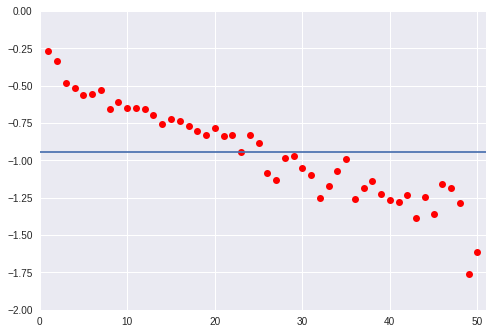

In [0]:
plt.plot(list(range(min_num,max_num+1)),score_list,'ro')
plt.axis([min_num-1,max_num+1,math.floor(min(score_list)),math.ceil(max(score_list))])
plt.axhline(y=sum(score_list)/len(score_list))
plt.show()

### visualize LDA

In [0]:
topic_num = 29

In [0]:
lda_model = LdaModel(corpus = lda_doc_term_matrix, 
                   num_topics = topic_num, 
               id2word = dictionary,                                    
                       passes = 10)

In [0]:
cm = CoherenceModel(model=lda_model, corpus = lda_doc_term_matrix,dictionary = dictionary, coherence='u_mass')

In [0]:
cm.get_coherence_per_topic()

[-1.3928894919453536,
 -2.9792757167078756,
 -0.42958804630533415,
 -0.5202508984679528,
 -0.7170291781024012,
 -0.5403631839205124,
 -1.0782960944151114,
 -5.629659041207556,
 -0.6801776733192657,
 -0.8464076327237231,
 -0.42950515720289045,
 -0.7754426888605774,
 -1.0717429607676605,
 -0.8192592767628152,
 -1.117201413723555,
 -1.2216501579126187,
 -0.5406221989789729,
 -0.5995724887950162,
 -0.7253367283495116,
 -1.0060390775005763,
 -2.763130012491944,
 -1.1010496495590998,
 -0.8087592800934094,
 -1.2562841322938567,
 -0.358817783746354,
 -0.40853438337120235,
 -0.6138956694095484,
 -1.0173365578675746,
 -1.0862951597274206]

In [0]:
vis_data = pyLDAvis.gensim.prepare(lda_model, lda_doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)

In [0]:
# # Creating the term dictionary of our corpus, where every unique term is assigned an index.  
# dictionary = corpora.Dictionary(doc_clean)

# # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above. 
# doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# # Creating the object for LDA model using gensim library
# Lda = gensim.models.ldamodel.LdaModel

# # Running and Training LDA model on the document term matrix
# ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

# # Results 
# # print(ldamodel.print_topics())
# for topic in ldamodel.print_topics():
#     print(topic)

In [0]:
# remove_stopwords("this")